In [17]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
from matplotlib import pyplot as plt
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils
from mrcnn import visualize
import paper
import random
from glob import glob

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs

PRETRAINED_MODEL_PATH = "C:/Users/darksoul/Mask_RCNN/mask_rcnn_paper_0060.h5"
IMAGE_DIR = "C:/Users/darksoul/Mask_RCNN/datasets/4points2/"

In [11]:
class InferenceConfig(paper.PaperConfig):
            # Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
config = InferenceConfig()
config.display()

model = modellib.MaskRCNN(mode="inference", config=config, model_dir='C:/Users/darksoul/Mask_RCNN/logs')
model_path = PRETRAINED_MODEL_PATH
# or if you want to use the latest trained model, you can use : 
# model_path = model.find_last()[1]
model.load_weights(model_path, by_name=True)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [19]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = paper.PaperDataset()
dataset.load_paper(IMAGE_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

LINE 244 of paper.py--- a1005.jpg
LINE 244 of paper.py--- a105.jpg
LINE 244 of paper.py--- a210.jpg
LINE 244 of paper.py--- a300.jpg
LINE 244 of paper.py--- a405.jpg
LINE 244 of paper.py--- a510.jpg
LINE 244 of paper.py--- a600.jpg
LINE 244 of paper.py--- a705.jpg
LINE 244 of paper.py--- a810.jpg
LINE 244 of paper.py--- a900.jpg
LINE 244 of paper.py--- b105.jpg
LINE 244 of paper.py--- b210.jpg
LINE 244 of paper.py--- b300.jpg
LINE 244 of paper.py--- b405.jpg
LINE 244 of paper.py--- b510.jpg
LINE 244 of paper.py--- b600.jpg
LINE 244 of paper.py--- b705.jpg
LINE 244 of paper.py--- b810.jpg
LINE 244 of paper.py--- b900.jpg
LINE 244 of paper.py--- c1005.jpg
LINE 244 of paper.py--- c105.jpg
LINE 244 of paper.py--- c1110.jpg
LINE 244 of paper.py--- c1200.jpg
LINE 244 of paper.py--- c1305.jpg
LINE 244 of paper.py--- c210.jpg
LINE 244 of paper.py--- c300.jpg
LINE 244 of paper.py--- c405.jpg
LINE 244 of paper.py--- c510.jpg
LINE 244 of paper.py--- c600.jpg
LINE 244 of paper.py--- c705.jpg
LINE 

LINE 299 of paper.py--- [75, 100, 265, 187]


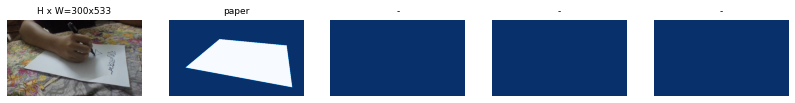

LINE 299 of paper.py--- [100, 149, 244, 152]


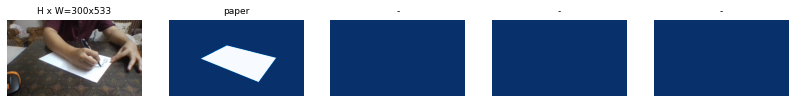

LINE 299 of paper.py--- [55, 89, 229, 137]


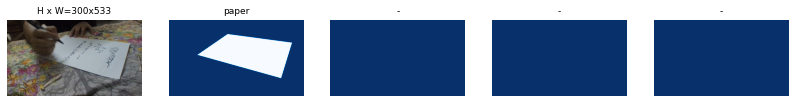

LINE 299 of paper.py--- [102, 150, 246, 158]


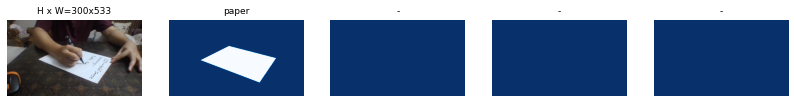

In [20]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

In [16]:
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

TypeError: list indices must be integers or slices, not str

# Prediction and merge masks 

In [5]:
file_names = glob(os.path.join(IMAGE_DIR, "*.jpg"))
masks_prediction = np.zeros((1200, 1600, len(file_names)))
for i in range(len(file_names)):
    print(i)
    image = skimage.io.imread(file_names[i])
    predictions = model.detect([image],  verbose=1)
    p = predictions[0]
    masks = p['masks']
    merged_mask = np.zeros((masks.shape[0], masks.shape[1]))
    for j in range(masks.shape[2]):
        merged_mask[masks[:,:,j]==True] = True
        masks_prediction[:,:,i] = merged_mask
print(masks_prediction.shape)

(1200, 1600, 0)


# Load Annotations

In [6]:
PREDICT_DIR = '/home/simon/deeplearning/mask_rcnn/data/surgery/'
dataset = paper.PaperDataset()
dataset.load_VIA(PREDICT_DIR, 'predict')

AttributeError: 'PaperDataset' object has no attribute 'load_VIA'

# Calculate Accuracy 

In [ ]:
accuracy = 0
precision = 0
for image_id in range(len(dataset.image_info)):
    name = dataset.image_info[image_id]['id']
    file_name = os.path.join(IMAGE_DIR, name)
    image_id_pred = file_names.index(file_name)
    merged_mask = masks_prediction[:, :, image_id_pred]
    
    annotated_mask = dataset.load_mask(image_id)[0]
    merged_annotated_mask = np.zeros((1200, 1600))
    for i in range(annotated_mask.shape[2]):
        merged_annotated_mask[annotated_mask[:,:,i]==True] = True
    accuracy  += np.sum(merged_mask==merged_annotated_mask) / (1200 * 1600)
    all_correct = np.sum(merged_annotated_mask[merged_mask == 1])
    precision += all_correct / (np.sum(merged_mask))
print('accuracy:{}'.format(accuracy / len(file_names)))
print('precision:{}'.format(precision / len(file_names)))

# Trained with 100 images
Accuracy: 99.49%
Precision:97.02%
# Trained with 200 images
Accuracy: 99.54%
Precision: 96.78%
# Trained with 200 images(60 epochs)
Accuracy: 99.53%
Precision: 97.28%

# Visualize Random IMage

In [ ]:
file_names = glob(os.path.join(IMAGE_DIR, "*.jpg"))
class_names = ['Paper']
test_image = skimage.io.imread(file_names[random.randint(0,len(file_names)-1)])
predictions = model.detect([test_image], verbose=1) # We are replicating the same image to fill up the batch_size
p = predictions[0]
visualize.display_instances(test_image, p['rois'], p['masks'], p['class_ids'], 
                            class_names, p['scores'])